## **Bank Marketing Campaign**

Jenis produk keuangan yang digunakan oleh masyarakat semakin beragam. Salah satu produk keuangan yang dikenal luas oleh masyarakat adalah deposito berjangka. Mekanisme deposito berjangka adalah ketika seorang nasabah menyetor sejumlah uang di bank atau lembaga keuangan, dan uang tersebut hanya dapat ditarik setelah jangka waktu tertentu. Sebagai imbalannya, nasabah akan diberikan bunga tetap sesuai dengan jumlah nominal uang yang disetor.

Meskipun begitu, sebagai entitas bisnis dengan produk keuangan dan nasabah masing-masing, bank-bank tetap harus bersaing agar tidak kehilangan nasabah. Salah satu cara untuk mendapatkan nasabah baru adalah dengan melakukan kampanye pemasaran.

Target :

0 : tidak melakukan deposito

1 : melakukan deposito


**Problem Statement :**

marketing bisa memakan waktu dan biaya jika Bank menargetkan semua calon nasabah tanpa melakukan penyaringan terlebih dahulu. Bank ingin meningkatkan calon nasabah mana yang ingin melakukan deposito.

Tapi jika nasabah tersebut tidak melakukan deposito maka bank sudah spent money untuk cost telemarketing dan pulsa yang mana ini akan menambah beban oprasional.

Jika bank tidak memberi penawaran marketing pada calon nasabah tsb. Maka bank akan kehilangan nasabah untuk melakukan deposito.
 

**Goals :**

Maka berdasarkan permasalahan tersebut, Bank ingin memiliki kemampuan untuk memprediksi kemungkinan seorang nasabah akan/ingin melakukan deposito pada Bank tersebut atau tidak, sehingga dapat memfokuskan marketing pada nasabah yang bersedia untuk melakukan deposito pada Bank tersebut.

Dan juga, Bank ingin mengetahui apa/faktor/variabel apa yang membuat seorang nasabah mau melakukan deposito untuk Bank mereka atau tidak, sehingga mereka dapat membuat rencana yang lebih baik dalam mendekati nasabah potensial (nasabah yang ingin melakukan deposito untuk Bank tersebut) .

**Analytic Approach :**

Jadi yang akan kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan nasabah yang mau melakukan deposito untuk Bank dan yang tidak mau.

Kemudian kita akan membangun model klasifikasi yang akan membantu Bank untuk dapat memprediksi probabilitas seorang nasabah akan/ingin melakukan deposito di Bank tersebut atau tidak.

## **Metric Problem**

Metric:
- False Negative: 
    - ML memprediksi si calon nasabah tidak akan melakukan deposito, padahal aslinya nasabah ingin melakukan deposito.
    - Jika calon nasabah diprediksi tidak akan melakukan deposito, maka bank akan kehilangan nasabah untuk melakukan deposito.
    - Kita simulasikan bank akan kehilangan pendapatan bunga sekitar **2,7% dari deposito nasabah** rupiah. (berdasarkan data exsisting: rata-rata orang yang melakukan deposito $ 1812, maka pendapatan bunganya sekiat **$49**  )
- False Positive: 
    - ML memprediksi si calon nasabah akan deposito, padahal aslinya dia tidak melakukan deposito.
    - Jika calon nasabah diprediksi akan deposito, Bank memberi perhatian pada calon nasabah tsb. tapi jika nasabah tersebut tidak melakukan deposito maka bank akan sudah spent money untuk cost telemarketing dan pulsa yang mana ini akan menambah beban oprasional.
    - Upah minimum di negara bagian california per 1 Januari 2023 tercatat sebesar US$ 15,50 per jam. asumsikan 1 jam 1 calon nasabah
dan Rata-rata biaya per menit panggilan dari telepon seluler ke telepon seluler lainnya adalah $0,22
,jadi biaya marketing per nasabah sekitar **$29**.


Dampak kehilangan pendapatan bunga calon nasabah baru dianggap jauh lebih prioritas daripada cost marketing. 
Dengan kata lain cost False Negative lebih besar walaupun kita tetap mempertimbangkan kedua metric tersebut.
Maka dari itu metric yg dipakai adalah **F2-Score**.
<br>


source: 
<br>
https://katadata.co.id/agungjatmiko/lifestyle/6409829e8e6c3/mengintip-besaran-gaji-di-amerika-serikat-berdasarkan-negara-bagian#:~:text=5.-,New%20York,%24%2014%2C20%20per%20jam.
<br>
https://solaroidenergy.com/product/how-much-is-phone-bills-in-usa/#:~:text=The%20average%20monthly%20cost%20of,taxes%2C%20surcharges%2C%20and%20charges.
<br>
https://tradingeconomics.com/united-states/bank-net-interest-margin-percent-wb-data.html

Note : 
- Dataset seimbang yaitu sekitar (48:52)
- Sebagian besar fitur bersifat kategori (Nominal, Ordinal, Binary)
- Setiap baris data merepresentasikan informasi seorang calon nasabah yang akan melakukan deposito

## **1.Data Cleaning**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split

# menyatukan beberapa tahap preprocessing atau fungsi lainnya
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline

# encoder dan scaler
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

# resampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE

# algoritma ML
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

# cross validation untuk menentukan algoritma terbaik
from sklearn.model_selection import cross_val_score, StratifiedKFold

# metrics untuk regresi
from sklearn.metrics import f1_score, classification_report, confusion_matrix, precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

Data pemasaran:
- contact: Jenis komunikasi kontak.
- month: Bulan terakhir kontak dalam setahun.
- campaign: Jumlah kontak yang dilakukan selama kampanye ini dan untuk pelanggan ini.
- pdays: berapa hari jarak dia menerima campaign dengan konfirmasi si calon nasabah.
- poutcome: Hasil dari kampanye pemasaran sebelumnya.
- deposit: Apakah pelanggan melakukan deposito atau tidak.


### 1.1 disini saya mengentepretasikan data pada kolom "pdays" adalah berapa hari jarak dia menerima campaign dengan konfirmasi si calon nasabah. di sini saya melakukan perubahan data dari -1 menjadi 1. ini untuk memudahkan secara entepretasi bisnis.

In [2]:
df = pd.read_csv('data_bank_marketing_campaign.csv') 
df[df['pdays']>-1].sort_values('pdays')

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
2449,38,management,1199,no,no,cellular,aug,1,1,success,yes
813,62,retired,569,no,no,cellular,aug,1,1,success,yes
4687,46,entrepreneur,122,no,no,cellular,feb,2,1,failure,no
1605,28,blue-collar,1285,no,no,telephone,jan,2,2,other,no
4204,34,technician,0,yes,no,cellular,aug,2,2,success,yes
...,...,...,...,...,...,...,...,...,...,...,...
1324,27,blue-collar,821,yes,yes,unknown,sep,1,778,other,no
399,31,blue-collar,0,yes,no,unknown,aug,1,782,other,yes
6918,32,technician,1547,no,no,cellular,oct,1,805,other,yes
1175,34,blue-collar,320,yes,no,cellular,aug,1,828,failure,yes


disini saya mengentepretasikan data pada kolom "pdays" adalah berapa hari jarak dia menerima campaign sampai konfirmasi si calon nasabah untuk deposit or No. 

In [3]:
df['pdays'] = df['pdays'].replace({-1:1})
df.head()
# disini saya mengentepretasikan data pada kolom "pdays" adalah berapa hari jarak dia menerima campaign sampai konfirmasi si calon nasabah untuk deposit or No. 
# di sini saya melakukan perubahan data dari -1 menjadi 1. ini untuk memudahkan secara entepretasi bisnis.

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,1,unknown,no


### 1.2 disini saya melakukan klasifikasi terhadap target menggunkan angka untuk memudahkan proses difine X da Y 

In [4]:
df['deposit'] = np.where(df['deposit'] == 'yes', 1, 0)
df

### disini saya melakukan klasifikasi terhadap target menggunkan angka untuk memudahkan proses difine X da Y 

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,1,unknown,1
1,39,self-employed,-3058,yes,yes,cellular,apr,3,1,unknown,1
2,51,admin.,3025,no,no,cellular,may,1,352,other,1
3,38,services,-87,yes,no,cellular,may,1,1,unknown,0
4,36,housemaid,205,yes,no,telephone,nov,4,1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,1,unknown,1
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,1
7810,36,unknown,179,no,no,cellular,aug,8,1,unknown,0
7811,31,admin.,54,yes,no,cellular,nov,1,1,unknown,0


### 1.3 disini saya melakukan perapian data yang bias menjadi data satu kelompok tertentu agar mudah di enterpretasikan.

In [5]:
len(df[df['poutcome']=='other'])

385

In [6]:
df['poutcome'] = df['poutcome'].replace('other', 'unknown')

### 1.4 menampilkan data mulai dari info, missing value, duplicated dan balance data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   int32 
dtypes: int32(1), int64(4), object(6)
memory usage: 641.0+ KB


In [8]:
df.describe(include='all')

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
count,7813.000000,7813,7813.000000,7813,7813,7813,7813,7813.000000,7813.000000,7813,7813.000000
unique,NaN,12,NaN,2,2,3,12,NaN,NaN,3,NaN
top,NaN,management,NaN,no,no,cellular,may,NaN,NaN,unknown,NaN
freq,NaN,1792,NaN,4140,6789,5628,1976,NaN,NaN,6204,NaN
mean,41.257264,NaN,1512.448611,NaN,NaN,NaN,NaN,2.519775,52.897607,NaN,0.477665
std,11.919710,NaN,3089.291831,NaN,NaN,NaN,NaN,2.727001,107.351661,NaN,0.499533
min,18.000000,NaN,-6847.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,0.000000
25%,32.000000,NaN,127.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,0.000000
50%,39.000000,NaN,549.000000,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,0.000000
75%,49.000000,NaN,1684.000000,NaN,NaN,NaN,NaN,3.000000,40.000000,NaN,1.000000


In [9]:
## melihat mising value
df.isna().sum()

age         0
job         0
balance     0
housing     0
loan        0
contact     0
month       0
campaign    0
pdays       0
poutcome    0
deposit     0
dtype: int64

In [10]:
df.duplicated().sum() 

8

In [11]:
df.shape

(7813, 11)

In [12]:
# saya melakukan penghapusan data duplicated di karenakan jumlah datanya sedikit (8 data dari 7813 data).

df = df.drop_duplicates()
df.shape

(7805, 11)

In [13]:
df['deposit'].value_counts()

0    4075
1    3730
Name: deposit, dtype: int64

In [14]:
df['deposit'].value_counts() / len(df)
# datanya tergolong balance,

0    0.522101
1    0.477899
Name: deposit, dtype: float64

## **2.Data Understanding &  Exploratory data analysis (EDA)**

### **2.1 mengetahui rata-rata feature ['age', 'balance', 'campaign', 'pdays', 'deposit'] terhadap nasabah yang melakukan deposito atau tidak.**

In [15]:
num_feature = df.describe().columns
num_feature

Index(['age', 'balance', 'campaign', 'pdays', 'deposit'], dtype='object')

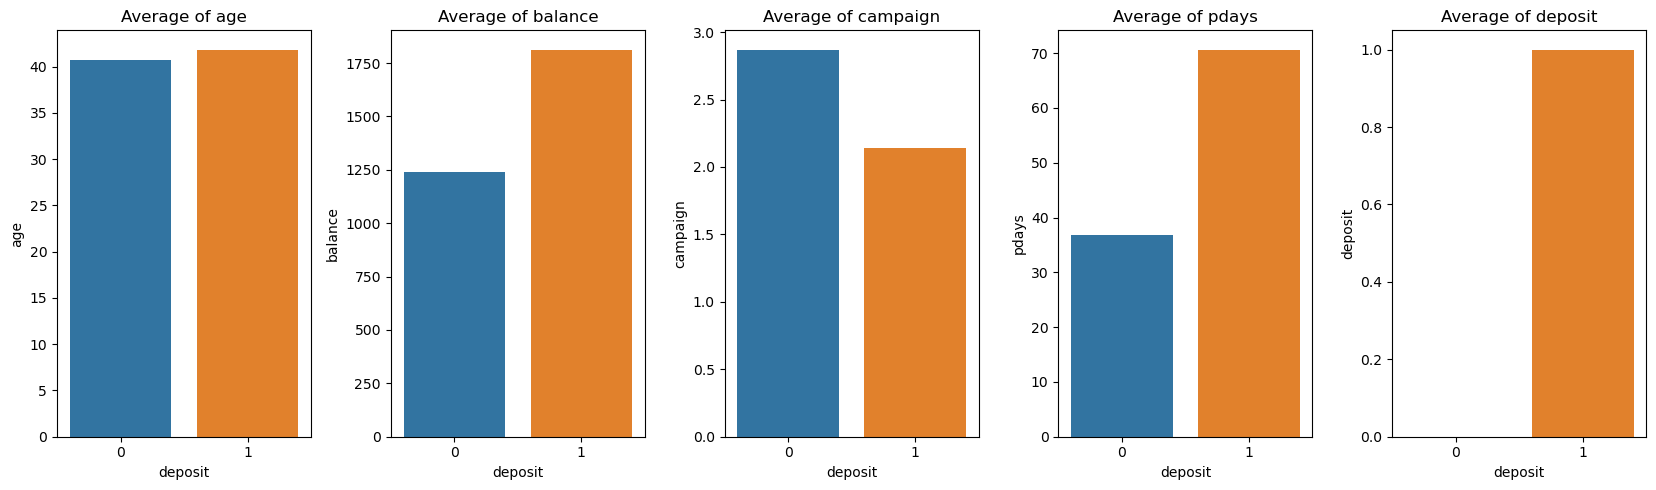

In [16]:
plt.figure(figsize=(20,5))

for col in range(len(num_feature)):

    plt.subplot(1,6, col+1)
    sns.barplot(data=df, x='deposit', y=num_feature[col], ci=0)  # default barplot adalah average
    plt.title('Average of ' + num_feature[col])

plt.tight_layout()

insight:
- secara rata2 umur nasabah yang melakukan deposito mempunyai rata2 umur lebih tinggi darpada nasabah yang tidak melakukan deposito
- secara rata2 tabungan nasabah yang melakukan deposito mempunyai rata2 tabungan lebih tinggi darpada nasabah yang tidak melakukan deposito
- secara rata2 campaign nasabah yang melakukan deposito mempunyai rata2 campaign lebih rendah darpada nasabah yang tidak melakukan deposito
- secara rata2 hari dimana nasabah terakhir dihubungi yang melakukan deposito mempunyai rata2 hari  lebih tinggi darpada nasabah yang tidak melakukan deposito

### **2.2 mengetahui banyaknya nasabah di feature ['housing', 'loan', 'poutcome','contact','job','month'] terhadap nasabah yang melakukan deposito atau tidak.**

In [17]:
cat_feature = df.describe(include='object').columns
cat_feature = cat_feature.drop(['job','month','contact'])
cat_feature

Index(['housing', 'loan', 'poutcome'], dtype='object')

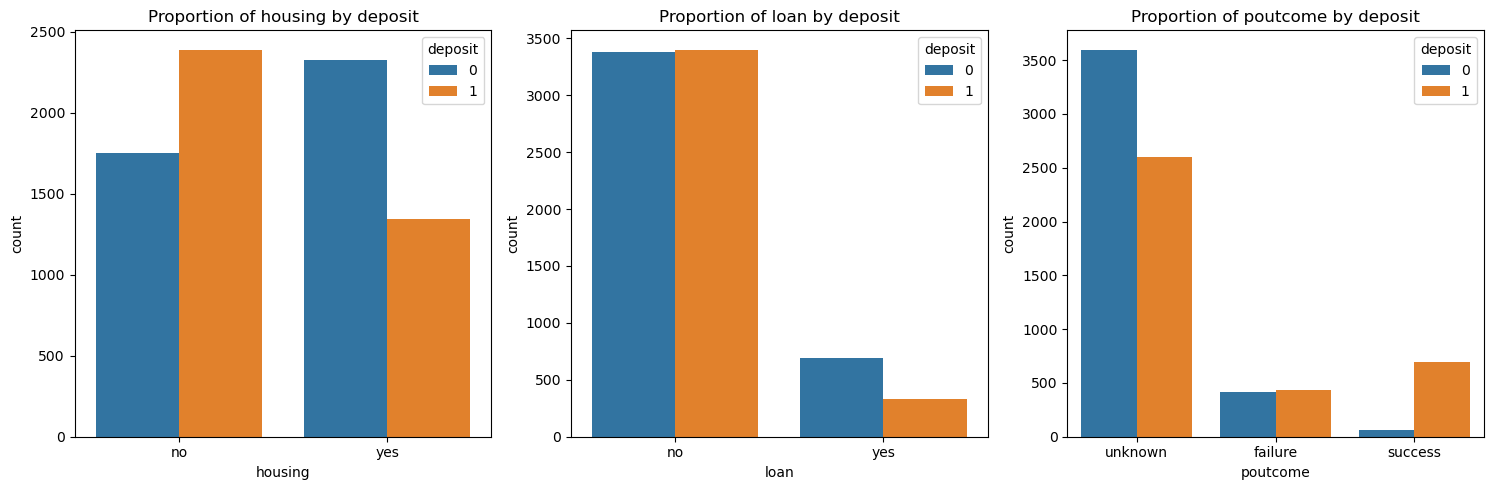

In [18]:
plt.figure(figsize=(20,5))

for col in range(len(cat_feature)):

    plt.subplot(1,len(cat_feature)+1, col+1)
    sns.countplot(data=df, x=cat_feature[col], hue='deposit')
    plt.title('Proportion of ' + cat_feature[col] + ' by deposit')

plt.tight_layout()

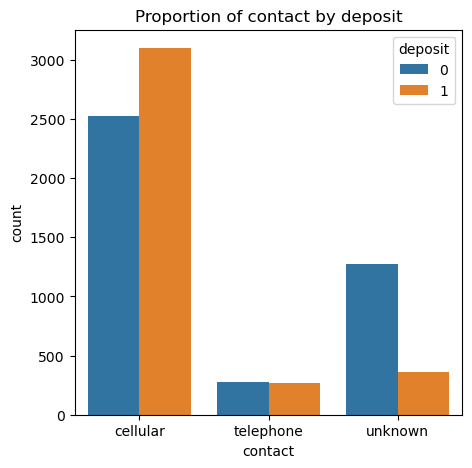

In [19]:
plt.figure( figsize=(5, 5))

sns.countplot(data=df, x='contact', hue='deposit')
plt.title('Proportion of contact by deposit')
plt.show()

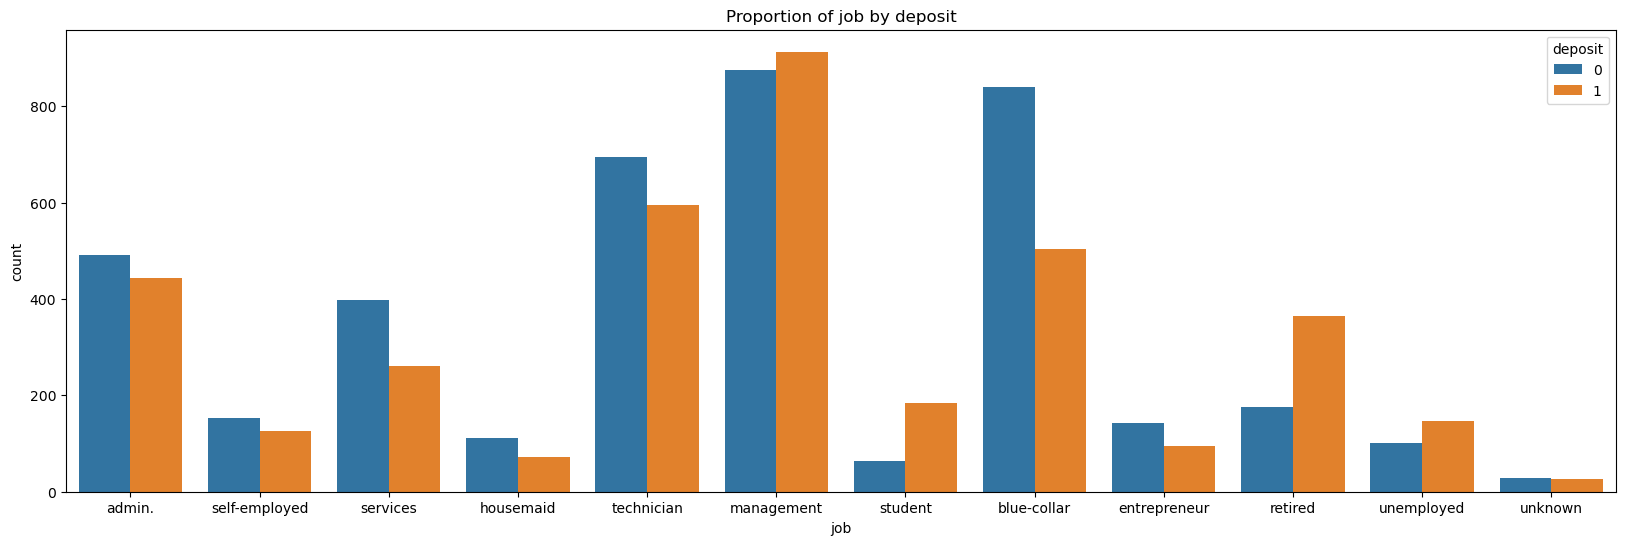

In [20]:
plt.figure( figsize=(20, 6))

sns.countplot(data=df, x='job', hue='deposit')
plt.title('Proportion of job by deposit')
plt.show()

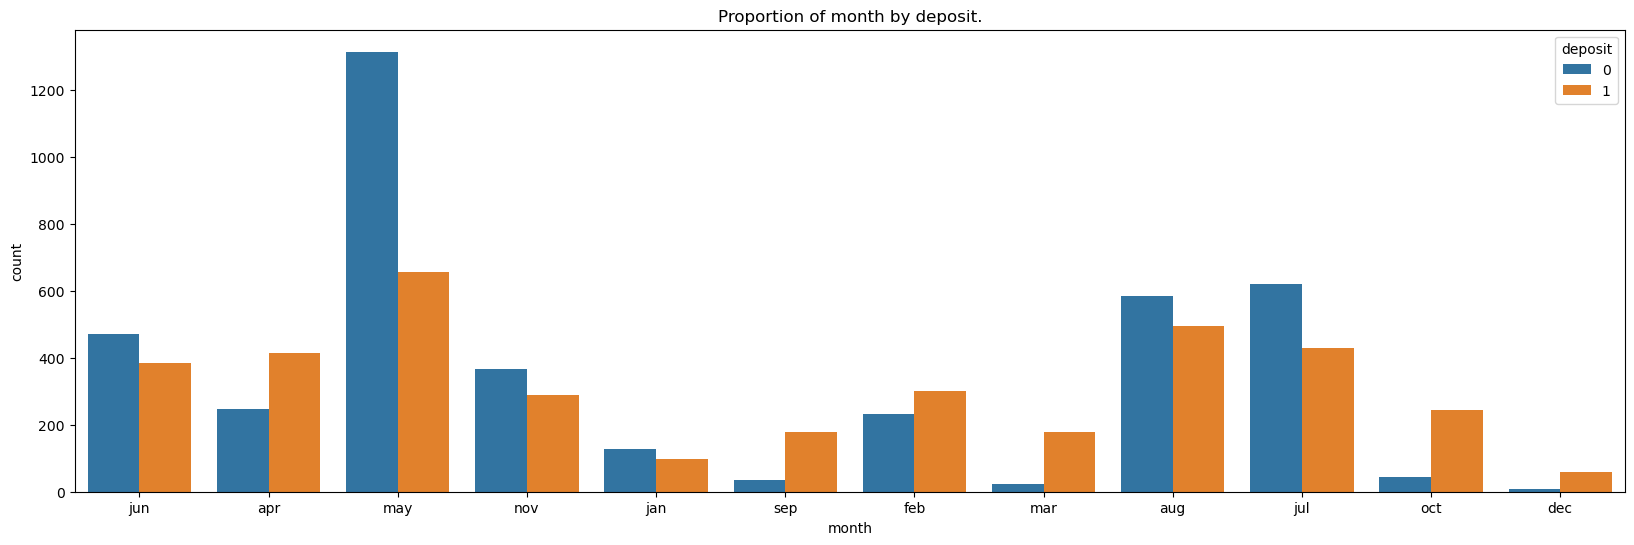

In [21]:
plt.figure( figsize=(20, 6))

sns.countplot(data=df, x='month', hue='deposit')
plt.title('Proportion of month by deposit.')
plt.show()

Insight:
- jumlah nasabah yang tidak mempunyai rumah akan melekukan deposito di bandingkan jumlah nasabah yang mempunyai rumah.
- jumlah nasabah yang tidak mempunyai pinjaman akan melekukan deposito di bandingkan jumlah nasabah yang mempunyai pinjaman.
- jumlah nasabah yang melakukan deposito paling banyak dihubungi lewat cellular
- jumlah nasabah melakukan deposito banyak yang tidak diketahui oleh marketing
- nasabah dengan pekerjaan management paling banyak melakukan deposito
- bulan may nasabah paling banyak menolak melakukan deposito.

### **2.3 Mengetahui korelasi feature terhadap nasabah yang melakukan deposito**

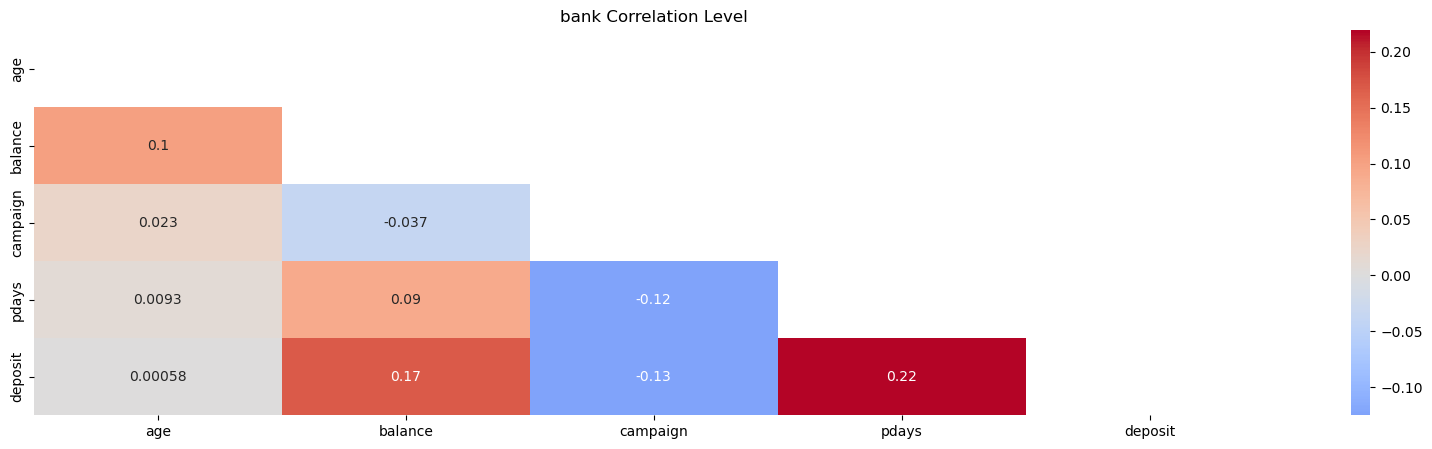

In [22]:
plt.figure(figsize=(20,5))
matrix = np.triu(df.corr())
sns.heatmap(
    data=df.corr(method='spearman'),
    annot = True,
    cmap = 'coolwarm',
    center = 0,
    mask = matrix,
    # method='spearman'
)
plt.title('bank Correlation Level')
plt.show()

Insight:

- Jika kita lihat heatmap diatas maka korelasinya sama dengan hasil barplot. Dari sini kita ketahui bahwa Jumlah hari setelah klien dihubungi dari kampanye sebelumnya nasabah yang tidak melakukan deposito jarang dihubungi jika dibandingkan dengan nasabah yang menlakukan deposito. walaupun korelasinya kecil

### **2.4 Outliers Detection**

**Outliers Detection**

Banyaknya outliers pada data tentu akan memengaruhi hasil analisis dan pemodelan yang dilakukan. Ada beberapa hal yang harus dipertimbangkan sebelum memutuskan treatment yang sesuai dengan data, di antaranya adalah dengan mempertimbangkan sisi domain knowledge bisnis bank tersebut disini saya tidak melakukan handle data outlier pada feature balance  dan numerical lainya dengan alasan berdasarkan data dibawah ini.

In [23]:
df[df['balance']<0]['loan'].value_counts()

no     325
yes    154
Name: loan, dtype: int64

berdasarkan data diatas nasabah yang yang mempunyai balance negatif ternayata di kolom "loan" dia tidak mempunyai pinjaman(325). saya mengentepretasikan data ini bahwa nasabah tersebut mempunyai pinjaman di bank lain untuk kepentingan dimasa depan. maka dari itu saya tidak melakukan handling outlier pada kolom balance. sedangkan feature numerical lainya data outliernya tidak begitu tersebar jauh. maka dari itu saya akan menggunakan scaling robust karena scaling ini resitant terhadap data outlier   

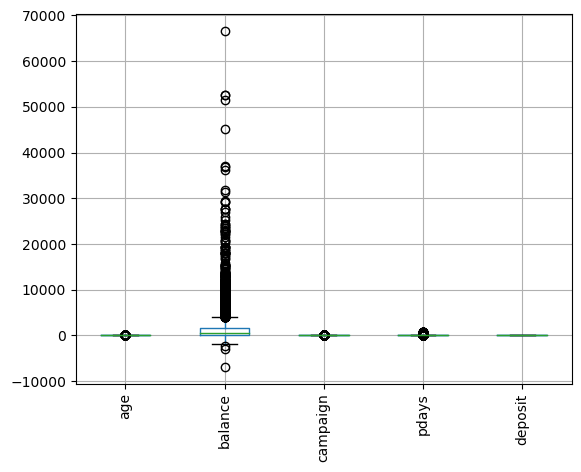

In [24]:
# Plot boxplot untuk mengecek outliers
df.boxplot(rot=90);

## **3.Define X dan y**

In [25]:
X = df.drop(columns='deposit')
y = df['deposit']

## **4.Data spiltting**

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

## **5.Data preprocessing**

In [27]:
X.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome
0,55,admin.,1662,no,no,cellular,jun,2,1,unknown
1,39,self-employed,-3058,yes,yes,cellular,apr,3,1,unknown
2,51,admin.,3025,no,no,cellular,may,1,352,unknown
3,38,services,-87,yes,no,cellular,may,1,1,unknown
4,36,housemaid,205,yes,no,telephone,nov,4,1,unknown


In [28]:
df['job'].nunique()

12

In [29]:
df['contact'].nunique()

3

In [30]:
df['month'].nunique()

12

In [31]:
df['poutcome'].unique()

array(['unknown', 'failure', 'success'], dtype=object)

In [32]:
feat_num=num_feature.drop(labels='deposit')
feat_num

Index(['age', 'balance', 'campaign', 'pdays'], dtype='object')

In [33]:
cat_feature

Index(['housing', 'loan', 'poutcome'], dtype='object')

**Info:**
 
    Agar dapat menggunakan semua fitur yang dipilih, maka fitur-fitur kategorikal harus diubah menjadi fitur numerikal. Kita dapat menggunakan ColumnTransformer untuk dapat mengubah tipe datanya, yang mana nanti dapat diaplikasikan pada pipeline model.


Encode:
- Ordinal Encoder:
    - 'housing' 
    - 'loan'
    - 'poutcome'

- One Hot Encoder:
    - 'job'
    - 'contact'
    - 'month'

Scaler:
- MinMax
- Standard
- Robust

In [34]:
X.columns

Index(['age', 'job', 'balance', 'housing', 'loan', 'contact', 'month',
       'campaign', 'pdays', 'poutcome'],
      dtype='object')

**Info:**
 
    Disini saya melakukan ordinal mapping pada feature housing, loan, poutcome agar memudahkan dalam menginterpretasikan data secara mudah karena digunakan untuk mengubah variabel kategorikal menjadi representasi numerik berdasarkan urutan atau tingkatannya

In [35]:
# disini saya memberikan tingkatan katagorical dengan angka. jika tingkatan katagorical lebih tinggi maka pembobotan angkanya juga lebih tinggi  
# ordinal mapping 1
ordinal_mapping1 = [
    {'col':'housing', 'mapping':{'no':1, 'yes':0}},   # mengapa saya memberikan "no" lebih tinggi daripada "yes". berdasarkan data EDA "Proportion of housing by deposit" karena "no housing" lebih banyak melakukan deposit. 
    {'col':'loan', 'mapping':{'no':1, 'yes':0}},      # mengapa saya memberikan "no" lebih tinggi daripada "yes". berdasarkan data EDA "Proportion of loan by deposit" karena"no loan" lebih banyak melakukan deposit.
    {'col':'poutcome', 'mapping':{'failure':0, 'unknown':1, 'success':2}}   # disini saya memberi tingkatan ordinal 'unknown' dengan nilai tengah karena saya asumsikan kemungkinan bisa masuk kelompok sucsess atau failure. 
] 

In [36]:
X_train.head(3)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome
6687,27,admin.,1293,yes,no,cellular,apr,3,1,unknown
3975,31,technician,252,no,no,cellular,jun,3,1,unknown
368,65,retired,2416,no,no,cellular,feb,2,1,unknown


**Info:**
 
    Disini saya melakukan onehot encoder pada pada kolom job, contact dan month karena memiliki uniqe value yang sedikit dan datanya mudah untuk di entepretasikan.
    
    melakukan scaling pada feature age, balance, campaign, pdays dengan menggunakan robust scaler karena Metode ini berguna ketika kita ingin mempertahankan informasi yang terkandung dalam outlier, tetapi juga ingin mengurangi dampak mereka terhadap analisis atau model yang kita buat. Robust Scaler umumnya digunakan dalam pemrosesan data sebelum melibatkan algoritma yang sensitif terhadap outlier

In [37]:
# tarsformer 

pipe_ordinal_scale = Pipeline([
    ('ordinal', OrdinalEncoder(cols=['housing','loan','poutcome'], mapping=ordinal_mapping1)),
    ('scaler', RobustScaler())
])

transformer = ColumnTransformer([
    ('pipe_ordinal_scale', pipe_ordinal_scale, ['housing','loan','poutcome']),
    ('onehot', OneHotEncoder(), ['job', 'contact', 'month']),          # Disini saya melakukan onehot encoder pada pada kolom job, contact dan month karena memiliki uniqe value sedikit dan memberikan representasi yang jelas dan eksplisit untuk setiap kategori atau atribut.
    ('scaling', RobustScaler(), ['age','balance','campaign','pdays']), # melakukan scaling pada feature age, balance, campaign, pdays dengan menggunakan robust scaler untuk menyamakan skalanya
], remainder='passthrough')

In [38]:
# scaler
minmax = MinMaxScaler()
standard = StandardScaler()
robust = RobustScaler()

## **6.Cross Validation/Bechmark model**

In [39]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier 
from sklearn.ensemble import RandomForestClassifier      
from xgboost.sklearn import XGBClassifier   

In [40]:
# Define the models
logreg = LogisticRegression(random_state=0)  
knn = KNeighborsClassifier(n_neighbors=5)
tree = DecisionTreeClassifier(max_depth=5, random_state=0)
forest = RandomForestClassifier(random_state=0) 
adaboost = AdaBoostClassifier(random_state=0)
gboost = GradientBoostingClassifier(random_state=0)
xgboost = XGBClassifier(random_state=0)

In [41]:
from sklearn.metrics import make_scorer, fbeta_score

In [42]:
# buat scoring f2 score (recall lebih penting dari pada precision, tapi tetap memperhatikan keduanya)
f2 = make_scorer(fbeta_score, beta=2)

# buat scoring f0.5 score (precision lebih penting dari pada rcall, tapi tetap memperhatikan keduanya)
f_setengah = make_scorer(fbeta_score, beta=0.5)

In [43]:
# Pilihan model
models = [logreg, knn, tree, forest, adaboost,gboost,xgboost]

cv_mean = []
cv_std = []
cv_all = []


# Mencari model terbaik berdasarkan f2 score terbesar dan std terkecil
for i in models:
    
    skfold = StratifiedKFold(n_splits = 5)

    model_pipe = Pipeline([
        ('resampling', None),
        ('prep', transformer), 
        ('model', i)])
    
    model_cv = cross_val_score(
        model_pipe, 
        X_train, 
        y_train, 
        cv = skfold, 
        scoring = f2,
        error_score='raise'
        )

    cv_mean.append(model_cv.mean())
    cv_std.append(model_cv.std())
    cv_all.append(model_cv.round(4))

In [44]:
df_cv = pd.DataFrame({
    'algo': models,
    'mean': cv_mean,
    'std': cv_std,
    'all': cv_all
})

df_cv

,algo,mean,std,all
0,LogisticRegression(random_state=0),0.624836,0.021456,"[0.6276, 0.6387, 0.5918, 0.654, 0.6121]"
1,KNeighborsClassifier(),0.622325,0.017727,"[0.6407, 0.625, 0.5894, 0.6342, 0.6224]"
2,"DecisionTreeClassifier(max_depth=5, random_sta...",0.522123,0.065982,"[0.5856, 0.3988, 0.5561, 0.5577, 0.5123]"
3,RandomForestClassifier(random_state=0),0.652531,0.015012,"[0.6513, 0.6626, 0.6265, 0.6711, 0.6512]"
4,AdaBoostClassifier(random_state=0),0.632009,0.017782,"[0.6456, 0.6412, 0.6007, 0.6484, 0.6241]"
5,GradientBoostingClassifier(random_state=0),0.634967,0.017472,"[0.6568, 0.6503, 0.6086, 0.6353, 0.6239]"
6,"XGBClassifier(base_score=None, booster=None, c...",0.632913,0.021507,"[0.6428, 0.6538, 0.6031, 0.6535, 0.6113]"


**best model**

    Random Forest Classifier adalah model algoritma tebaik. karena model ini mempunyai hasil mean yang paling besar dari beberapa model algoritma yang lain dan paling stabil(std paling kecil). maka slanjutnya model ini akan menjadi acuan tunning 

## **7.Hypertunning**

### **7.1 Tuning dengan randaom search**

**a.RandomForestClassifier**

 Random Forest Classifier adalah algoritma pembelajaran mesin yang menggabungkan banyak pohon keputusan untuk membuat prediksi akhir. Dataset pelatihan diacak dan digunakan untuk membangun pohon-pohon keputusan secara acak. Prediksi akhir didapatkan dengan memadukan hasil prediksi dari setiap pohon dalam ensemble. Random Forest Classifier memiliki kelebihan seperti mengatasi overfitting dan bisa menangani data yang hilang atau tidak seimbang.

- Tambah n_estimator ---> more averaging ---> decrease overfit
- Tambah max_features ---> prone to best decision ---> overfit prone
- Tambah max_depth ---> more decision ---> overfit prone
- Tambah min_samples_leaf ---> prevent split ---> decrease overfit
- Tambah min_samples_split ---> prevent split ---> decrease overfit

In [45]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 

In [46]:
ros = RandomOverSampler(random_state=0)
rus = RandomUnderSampler(random_state=0)
nearmiss = NearMiss()
smote = SMOTE(random_state=0)

In [47]:
# ?RandomForestClassifier

In [48]:
hyperparam_Rf = {
    'model__n_estimators': range(50,1001,20), # melihat dari jumlah model(pohon) yang dihasilkan besar semakin bagus tapi waktu fittingnya semakin lama.
    'model__max_features': range(1,11,1), # melihat dari banyak featurenya yang berjumlah 10
    'model__max_depth': range(2,31,2), # saya sudah melakukan range(2,50,2) hasil best scorenya hampir sama, jika saya memilih range(2,50,2) datanya lebih overfitting
    'model__min_samples_split': range(2,100,5), # saya mengambil sekitar >1% dari jumlah baris dari data set dengan step 5. karena nilai min_samples_split yang terlalu besar juga dapat menyebabkan underfitting
    'model__min_samples_leaf': range(2,100,5), # saya mengambil sekitar >1% dari jumlah baris dari data set dengan step 5. karena nilai min_samples_leaf yang terlalu besar juga dapat menyebabkan underfitting
    'resampling' : [None, rus, ros, nearmiss, smote], # disini mencari resapling mana yang terbaik.
    'prep__pipe_ordinal_scale__scaler': [minmax, standard, robust], # disini mencari scaling mana yang terbaik.
    'prep__scaling': [minmax, standard, robust] # disini mencari scaling mana yang terbaik.
}

model_pipe_Rf = Pipeline([
    ('resampling', None),
    ('prep', transformer), 
    ('model', forest)])

# random Rf
randomsearch_Rf = RandomizedSearchCV(          # mengambil secara acak model dari keseluruhan model karena tidak membutuhkan waktu fitting yg lama jika dibandingkan gridsearch
    estimator= model_pipe_Rf,                  # model
    param_distributions= hyperparam_Rf,        # hyperparameter yang mau dituning
    cv= 5,                                     # jumlah fold
    scoring=f2,                                # metrics
    n_jobs=-1,                                 # pakai semua processor
    n_iter= 10000,                             # jumlah model yang dipilih secara random
    random_state= 0
)

In [49]:
randomsearch_Rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('resampling', None),
                                             ('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_ordinal_scale',
                                                                               Pipeline(steps=[('ordinal',
                                                                                                OrdinalEncoder(cols=['housing',
                                                                                                                     'loan',
                                                                                                                     'poutcome'],
                                                                                                               mapping=[{'col': 'housing',
                                                                                                                         'data_type': dtype('O'),
                                                                                                                         'mapping': no     0
yes    1
dtype: int64},
                                                                                                                        {'col': 'loan',
                                                                                                                         'data_type': dtype('O'),
                                                                                                                         '...
                                        'model__n_estimators': range(50, 1001, 20),
                                        'prep__pipe_ordinal_scale__scaler': [MinMaxScaler(),
                                                                             StandardScaler(),
                                                                             RobustScaler()],
                                        'prep__scaling': [MinMaxScaler(),
                                                          StandardScaler(),
                                                          RobustScaler()],
                                        'resampling': [None,
                                                       RandomUnderSampler(random_state=0),
                                                       RandomOverSampler(random_state=0),
                                                       NearMiss(),
                                                       SMOTE(random_state=0)]},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=2))

In [50]:
randomsearch_Rf.best_params_ 

{'resampling': RandomOverSampler(random_state=0),
 'prep__scaling': StandardScaler(),
 'prep__pipe_ordinal_scale__scaler': RobustScaler(),
 'model__n_estimators': 170,
 'model__min_samples_split': 17,
 'model__min_samples_leaf': 97,
 'model__max_features': 3,
 'model__max_depth': 2}

In [51]:
randomsearch_Rf.best_score_

0.7078670632612047

### **7.2 Tuning menggunakan gridsearch**
<br>
tuning ke-2 menggunakan gridsearch, saya lakukan untuk mencari optimasi accuracy model terbaik. kemudian mencari nilai yang dilewati(step) dari best parameter random search dengan step di persempit. dengan cara (+-) step. yaitu menguragi dan menambakhan nilai step sebelumnya dengan acuan nilai best parameter di random search. kemudian menggunakan step 1 atau 2 di gridsearch. 

cara ini saya lakukan untuk mengurangi kombinasi pemodelan yang ada dan tentunya waktu fitting yang lebih efesien.


In [52]:
hyperparam_RF = {
    'model__n_estimators': range(150,191,2),           # jumlah model (pohon)
    'model__max_features': range(2,5,1),               # parameter  mengontrol jumlah fitur yang dipertimbangkan saat melakukan split
    'model__max_depth': range(1,5,1),                  # kedalaman tiap pohon
    'model__min_samples_split': range(12,24,1),        # untuk mengatur jumlah minimum sampel agar dapat dibagi menjadi dua node anak (split).
    'model__min_samples_leaf': range(92,103,1),        # mengatur jumlah minimum sampel sebuah daun (leaf) dalam ensemble (kumpulan) pohon.
    'prep__pipe_ordinal_scale__scaler': [minmax, standard, robust],      # mengubah rentang nilai dari suatu fitur (variabel) dalam dataset agar memiliki skala yang serupa atau sebanding
    'prep__scaling': [minmax, standard, robust]        # mengubah rentang nilai dari suatu fitur (variabel) dalam dataset agar memiliki skala yang serupa atau sebanding
}

model_pipe_RF = Pipeline([
    ('resampling', ros),
    ('prep', transformer), 
    ('model', forest)])

# RF
gridsearch_RF = GridSearchCV(          # mendapatkan model terbaik karena membandingkan semua model yang ada
    estimator=model_pipe_RF,           # model  
    param_grid=hyperparam_RF,          # hyperparameter yang mau dituning
    cv=5,                              # jumlah fold  
    scoring=f2,                        # metrics
    n_jobs=-1                          # pakai semua processor
)

In [53]:
gridsearch_RF.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('resampling',
                                        RandomOverSampler(random_state=0)),
                                       ('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipe_ordinal_scale',
                                                                         Pipeline(steps=[('ordinal',
                                                                                          OrdinalEncoder(cols=['housing',
                                                                                                               'loan',
                                                                                                               'poutcome'],
                                                                                                         mapping=[{'col': 'housing',
                                                                                                                   'data_type': dtype('O'),
                                                                                                                   'mapping': no     0
yes    1
dtype: int64},
                                                                                                                  {'col': 'loan',
                                                                                                                   '...
                                        RandomForestClassifier(random_state=0))]),
             n_jobs=-1,
             param_grid={'model__max_depth': range(1, 5),
                         'model__max_features': range(2, 5),
                         'model__min_samples_leaf': range(96, 99),
                         'model__min_samples_split': range(16, 29),
                         'model__n_estimators': range(168, 173, 2),
                         'prep__pipe_ordinal_scale__scaler': [RobustScaler()],
                         'prep__scaling': [StandardScaler()]},
             scoring=make_scorer(fbeta_score, beta=2))

In [54]:
gridsearch_RF.best_params_

{'model__max_depth': 1,
 'model__max_features': 4,
 'model__min_samples_leaf': 98,
 'model__min_samples_split': 16,
 'model__n_estimators': 172,
 'prep__pipe_ordinal_scale__scaler': RobustScaler(),
 'prep__scaling': StandardScaler()}

In [55]:
gridsearch_RF.best_score_

0.7163475913255514

In [56]:
# score pada tiap kombinasi hyperparameter
cv_output = pd.DataFrame(gridsearch_RF.cv_results_).sort_values('mean_test_score', ascending=False)
cv_output.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__max_features,param_model__min_samples_leaf,param_model__min_samples_split,param_model__n_estimators,param_prep__pipe_ordinal_scale__scaler,param_prep__scaling,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
320,0.801238,0.014305,0.077002,0.007457,1,4,98,18,172,RobustScaler(),StandardScaler(),"{'model__max_depth': 1, 'model__max_features':...",0.719673,0.70915,0.736187,0.724247,0.692481,0.716348,0.014754,1
350,0.816250,0.035481,0.068801,0.004749,1,4,98,28,172,RobustScaler(),StandardScaler(),"{'model__max_depth': 1, 'model__max_features':...",0.719673,0.70915,0.736187,0.724247,0.692481,0.716348,0.014754,1
347,0.888397,0.047969,0.067601,0.003384,1,4,98,27,172,RobustScaler(),StandardScaler(),"{'model__max_depth': 1, 'model__max_features':...",0.719673,0.70915,0.736187,0.724247,0.692481,0.716348,0.014754,1
344,0.820662,0.023298,0.072200,0.006524,1,4,98,26,172,RobustScaler(),StandardScaler(),"{'model__max_depth': 1, 'model__max_features':...",0.719673,0.70915,0.736187,0.724247,0.692481,0.716348,0.014754,1
341,0.841649,0.035186,0.073801,0.009219,1,4,98,25,172,RobustScaler(),StandardScaler(),"{'model__max_depth': 1, 'model__max_features':...",0.719673,0.70915,0.736187,0.724247,0.692481,0.716348,0.014754,1


Performa model di Train Set
- Benchmark model: 0.654
- Hyperparameter Tuning (RandomizedSearchCV): 0.707
- Hyperparameter Tuning (GridSearchCV): 0.716

## **8. Predict to Test Set**

- Melakukan prediksi pada test set dengan menggunakan model terbaik dan hyperparameter terbaik.
- Membandingkan performa model sebelum tuning dan setelah tuning.


### **8.1. before tunning**

In [57]:
# define model
# benchmark model
model_pipe_benchmark = Pipeline([
    ('prep', transformer), 
    ('model', forest)])

model_pipe_benchmark.fit(X_train, y_train)

y_pred_benchmark = model_pipe_benchmark.predict(X_test)

fbeta_score(y_test, y_pred_benchmark, beta=2) 

0.6582900846763179

### **8.2 After Tunning**

In [58]:
# menggunakan model terbaik hasil random_search
model = randomsearch_Rf.best_estimator_
model.fit(X_train, y_train)

y_pred_randomizedsearch = model.predict(X_test)
fbeta_score(y_test, y_pred_randomizedsearch, beta=2)

0.7023933402705517

In [59]:
# menggunakan model terbaik hasil grid_search
best_model = gridsearch_RF.best_estimator_
best_model.fit(X_train, y_train)

y_pred_gridsearch = best_model.predict(X_test)
fbeta_score(y_test, y_pred_gridsearch, beta=2)



0.7188214376428753

In [60]:
import pickle

In [61]:
# menggunakan model terbaik hasil grid_search
best_model = gridsearch_RF.best_estimator_
best_model.fit(X_train, y_train)

# fit
best_model.fit(X, y)

# save with pickle
pickle.dump(best_model, open('best_model.sav', 'wb'))



## **9. Summary**

### **9.1 Performa Random forest pada Train Set**

In [62]:
print(df_cv.loc[3, 'mean'].round(4), 'Score Benchmark (sebelum hyperparameter tuning)')
print(randomsearch_Rf.best_score_.round(4), 'Score Model hasil RandomizedSearch (setelah hyperparameter tuning)') 
print(gridsearch_RF.best_score_.round(4), 'Score Model hasil GridSearch (setelah hyperparameter tuning)')

0.6525 Score Benchmark (sebelum hyperparameter tuning)
0.7079 Score Model hasil RandomizedSearch (setelah hyperparameter tuning)
0.7163 Score Model hasil GridSearch (setelah hyperparameter tuning)


### **9.2 Performa Random forest pada Test Set**

In [63]:
print(fbeta_score(y_test, y_pred_benchmark, beta=2).round(4), 'Score Benchmark (sebelum hyperparameter tuning)')
print(fbeta_score(y_test, y_pred_randomizedsearch, beta=2).round(4), 'Score Model hasil RandomizedSearch (setelah hyperparameter tuning)')
print(fbeta_score(y_test, y_pred_gridsearch, beta=2).round(4), 'Score Model hasil gridsearch (setelah hyperparameter tuning)')


0.6583 Score Benchmark (sebelum hyperparameter tuning)
0.7024 Score Model hasil RandomizedSearch (setelah hyperparameter tuning)
0.7188 Score Model hasil gridsearch (setelah hyperparameter tuning)


## **10. Optimize Threshold**

### **10.1 Opimaze Threshold menggunakan scoring f2**

In [ ]:
# pipeline
pipe_model = gridsearch_RF.best_estimator_

# fit
pipe_model.fit(X_train, y_train)

# ==================================================================================
list_threshold = np.arange(0.01, 1.00, 0.01)
list_f2 = []

for threshold in list_threshold:

    # predict
    y_pred_proba = pipe_model.predict_proba(X_test)[:, 1]       # hasil prediksi dalam bentuk probability
    y_pred_class = np.where(y_pred_proba > threshold, 1, 0)     # yg probability-nya di atas threshold masuk ke kelas 1 

    # f1 score
    list_f2.append(fbeta_score(y_test, y_pred_class, beta=2)) 

In [ ]:
df_th = pd.DataFrame()
df_th['threshold'] = list_threshold
df_th['f2'] = list_f2

df_th.sort_values(['f2','threshold'], ascending=[False, False]).head(3)

,threshold,f2
38,0.39,0.820682
37,0.38,0.820682
36,0.37,0.820682


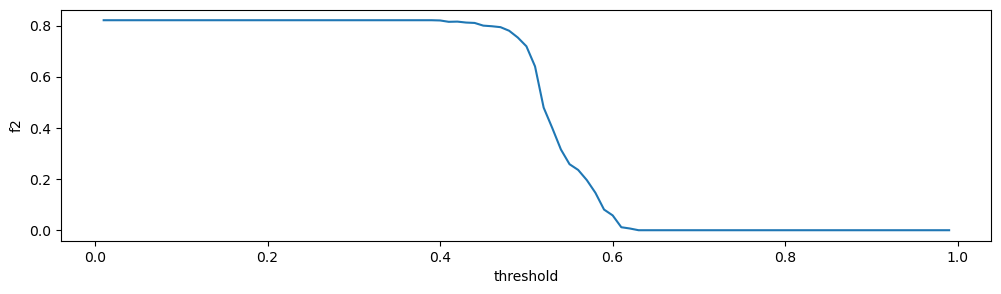

In [ ]:
plt.figure(figsize=(12,3))
sns.lineplot(data=df_th, x='threshold', y='f2');

In [ ]:
best_threshold = df_th.sort_values(['f2','threshold'], ascending=[False, False]).head(3).iloc[0,0]
best_threshold

0.39

disini best threshold digunakan untuk mengklasifikasikan calon nasabah untuk masuk ke kelas 1 

In [ ]:
# Modeling dengan Best Threshold

# pipeline
pipe_model = gridsearch_RF.best_estimator_

# fit
pipe_model.fit(X_train, y_train)

# predict
y_pred_proba = pipe_model.predict_proba(X_test)[:, 1]                # hasil prediksi dalam bentuk probability
y_pred_optimized = np.where(y_pred_proba > best_threshold, 1, 0)     # yg probability-nya di atas 0.42 masuk ke kelas 1

# f2
fbeta_score(y_test, y_pred_optimized, beta=2)

0.8206820682068208

### **10.2 Opimaze Threshold menggunakan margin/profit**

- jika kita ambil tabungan rata-rata nasabah yang melakukan deposito sebesar $ 1812.4
- Upah minimum di negara bagian california per 1 Januari 2023 tercatat sebesar US$ 15,50 per jam. asumsikan 1 jam 1 calon nasabah
dan Rata-rata biaya per menit panggilan dari telepon seluler ke telepon seluler lainnya adalah $0,22
,jadi biaya marketing per nasabah sekitar $29, maka hitungannya kurang lebih akan seperti ini :

In [ ]:
# mencari tabungan rata-rata tabungan/balance nasabah yang melakukan deposito
df1 = df.copy()
df_deposit = df1[df1['deposit']==1]
balance = df_deposit['balance'].mean()
balance

1812.434584450402

mencari nilai margin/profit tiap nasabah

In [ ]:
# ini merupakan pendapatan bunga bank untuk tiap nasabahnya.
interest = 0.027
margin_interest = balance*interest
margin_interest

48.93573378016086

cost marketing yang dikeluarkan bank untuk tiap calon nasabah

In [ ]:
# cost marketing yang dikeluarkan bank untuk tiap calon nasabah
cost_marketing = 15.50 + (0.22*60)
cost_marketing

28.7

In [ ]:
fp = confusion_matrix(y_test, y_pred_class)[0, 1]  # nilai False positive
tp = confusion_matrix(y_test, y_pred_class)[1, 1]  # nilai true positive

In [ ]:
# pipeline
pipe_model = gridsearch_RF.best_estimator_

# fit
pipe_model.fit(X_train, y_train)

# ==================================================================================
list_threshold = np.arange(0.01, 1.00, 0.01)
list_margin = []

for threshold in list_threshold:

    # predict
    y_pred_proba = pipe_model.predict_proba(X_test)[:, 1]       # hasil prediksi dalam bentuk probability
    y_pred_class = np.where(y_pred_proba > threshold, 1, 0)     # yg probability-nya di atas threshold masuk ke kelas 1 

    # margin score
    fp = confusion_matrix(y_test, y_pred_class)[0, 1]
    tp = confusion_matrix(y_test, y_pred_class)[1, 1]

    th_margin = (tp*margin_interest)-(fp+tp)*cost_marketing
    th_margin
    list_margin.append(th_margin) 

In [ ]:
df_margin = pd.DataFrame()
df_margin['threshold'] = list_threshold
df_margin['margin'] = list_margin

df_margin=df_margin.sort_values(['margin','threshold'], ascending=[False, False])
df_margin

,threshold,margin
52,0.53,3677.633718
51,0.52,3480.320680
53,0.54,3246.853957
54,0.55,2954.024606
55,0.56,2736.588599
...,...,...
4,0.05,-8294.642600
3,0.04,-8294.642600
2,0.03,-8294.642600
1,0.02,-8294.642600


disini best threshold margin digunakan untuk mengklasifikasikan calon nasabah untuk masuk ke kelas 1 

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
best_threshold_margin = df_margin['threshold'].iloc[0]
best_threshold_margin 

0.53

In [ ]:
# Modeling dengan Best Threshold

# pipeline
pipe_model = gridsearch_RF.best_estimator_

# fit
pipe_model.fit(X_train, y_train)

# predict
y_pred_proba = pipe_model.predict_proba(X_test)[:, 1]                              # hasil prediksi dalam bentuk probability
y_pred_optimized_margin = np.where(y_pred_proba > best_threshold_margin, 1, 0)     # yg probability-nya di atas 0.42 masuk ke kelas 1

# margin
accuracy_score(y_test, y_pred_optimized_margin)  # saya menggunakan accuracy score karena tolak ukurnya adalah margin bukan matrix

0.6540679051889814

## **11. Confusion Matrix**

### **11.1 Precision Recall Curve**

In [ ]:
print(classification_report(y_test, y_pred_gridsearch))

              precision    recall  f1-score   support

           0       0.70      0.53      0.60       815
           1       0.59      0.76      0.67       746

    accuracy                           0.64      1561
   macro avg       0.65      0.64      0.63      1561
weighted avg       0.65      0.64      0.63      1561



In [ ]:
# prediksi probabilitas
y_pred_proba = best_model.predict_proba(X_test)

# Menyimpan probabilitas hanya untuk hasil positif.
y_pred_proba = y_pred_proba[:, 1]

# mengkalkulasi pr-curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

In [ ]:
df_pr_curve = pd.DataFrame({
    'precision': precision,
    'recall': recall,
    'thresholds': list(thresholds) + [0]
}).sort_values('precision', ascending=False)

df_pr_curve.head()

,precision,recall,thresholds
731,1.0,0.000000,0.000000
724,1.0,0.009383,0.611948
717,1.0,0.022788,0.606691
718,1.0,0.020107,0.607307
719,1.0,0.018767,0.607521


''

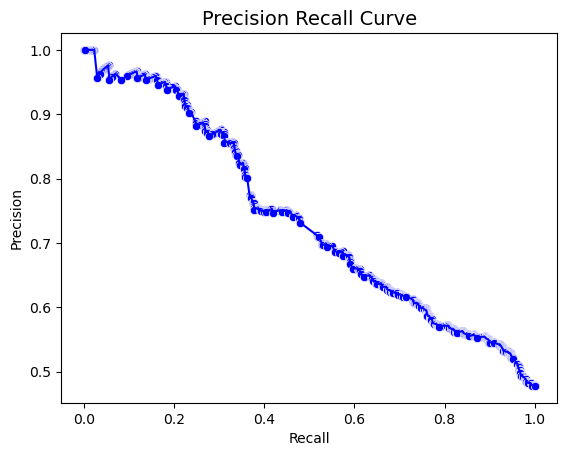

In [ ]:
# Precision Recall Curve manual

sns.lineplot(data=df_pr_curve, x='recall', y='precision', color='b')
sns.scatterplot(data=df_pr_curve, x='recall', y='precision', color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve', size=14)
;

In [ ]:
confusion_matrix(y_test, y_pred_gridsearch)

array([[428, 387],
       [180, 566]], dtype=int64)

### **11.2 Confusion Matrix Model sebelum tuning**

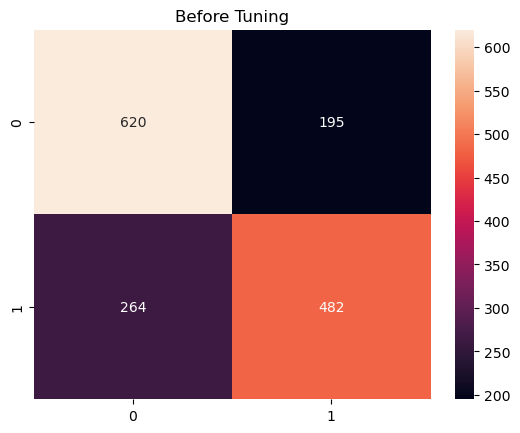

In [ ]:
# Model sebelum tuning
sns.heatmap(confusion_matrix(y_test, y_pred_benchmark), annot=True, fmt='g')
plt.title('Before Tuning');

Insight:
- TP: 480 (Nasabah diprediksi melakukan deposito, dan aktualnya ingin melakukan deposito)
- TN: 613 (Nasabah diprediksi tidak melakukan deposito, dan aktualnya juga tidak melakukan deposito)
- FP: 202 (Nasabah diprediksi melakukan deposito, tapi aktualnya TIDAK melakukan deposito)
- FN: 266 (Nasabah diprediksi TIDAK melakukan deposito, tapi aktualnya ingin melakukan deposito)

### **11.3 Confusion Matrix Model setelah tuning**

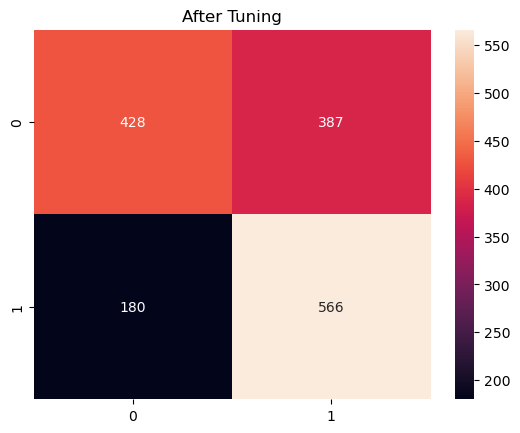

In [ ]:
# Model setelah tuning gridsearch
sns.heatmap(confusion_matrix(y_test, y_pred_gridsearch), annot=True, fmt='g')
plt.title('After Tuning');

Insight:
- TP: 542 (Nasabah diprediksi melakukan deposito, dan aktualnya ingin melakukan deposito)
- TN: 487 (Nasabah diprediksi tidak melakukan deposito, dan aktualnya juga tidak melakukan deposito)
- FP: 328 (Nasabah diprediksi melakukan deposito, tapi aktualnya TIDAK melakukan deposito)
- FN: 204 (Nasabah diprediksi TIDAK melakukan deposito, tapi aktualnya ingin melakukan deposito)

### **11.4 Confusion Matrix Model dengan threshold scoring f2**

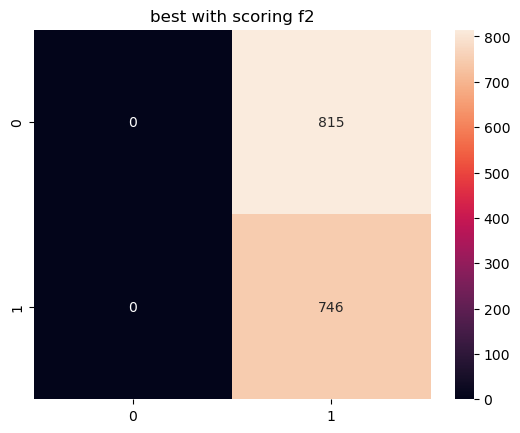

In [ ]:
# Model setelah tuning dengan trashold scoring
sns.heatmap(confusion_matrix(y_test, y_pred_optimized), annot=True, fmt='g')
plt.title('best with scoring f2');

In [ ]:
# data existing nasabah yang melakukan deposito (1) dan tidak(0)  
y_test.value_counts()

0    815
1    746
Name: deposit, dtype: int64

Insight:
- berdasarkan table heatmap diketahui bahwa confusion matrix dengan threshold scoring mempunyai nilai yang sama dengan data existing
- TP: 746 (Nasabah diprediksi melakukan deposito, dan aktualnya ingin melakukan deposito)
- FP: 815 (Nasabah diprediksi melakukan deposito, tapi aktualnya TIDAK melakukan deposito)
- artinya threshold menggunakan scoring sama saja dengan tidak menggunakan machine learning.


### **11.5 Confusion Matrix Model dengan Margin**

Text(0.5, 1.0, 'Threshold with Margin')

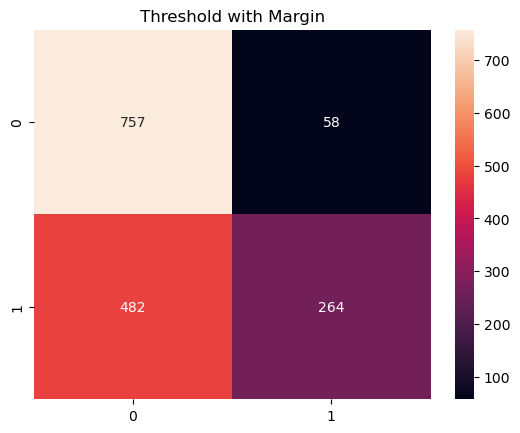

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_optimized_margin), annot=True, fmt='.0f')
plt.title('Threshold with Margin')

Insight:
- TP: 280 (Nasabah diprediksi melakukan deposito, dan aktualnya ingin melakukan deposito)
- TN: 760 (Nasabah diprediksi tidak melakukan deposito, dan aktualnya juga tidak melakukan deposito)
- FP: 55 (Nasabah diprediksi melakukan deposito, tapi aktualnya TIDAK melakukan deposito)
- FN: 466 (Nasabah diprediksi TIDAK melakukan deposito, tapi aktualnya ingin melakukan deposito)

### **11.6 Menampilkan seluruh Confusion Matrix**

''

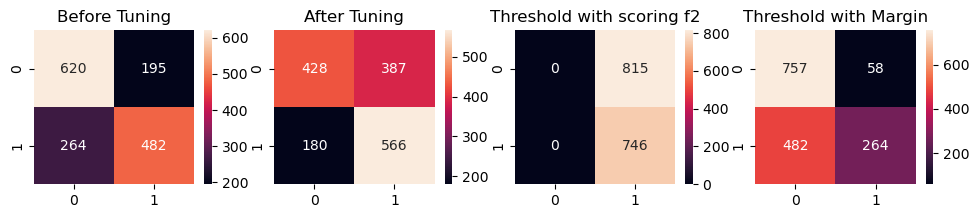

In [ ]:
plt.figure(figsize=(15,2))

plt.subplot(1,5,2)
sns.heatmap(confusion_matrix(y_test, y_pred_benchmark), annot=True, fmt='.0f')
plt.title('Before Tuning')

plt.subplot(1,5,3)
sns.heatmap(confusion_matrix(y_test, y_pred_gridsearch), annot=True, fmt='.0f')
plt.title('After Tuning')

plt.subplot(1,5,4)
sns.heatmap(confusion_matrix(y_test, y_pred_optimized), annot=True, fmt='.0f')
plt.title('Threshold with scoring f2')

plt.subplot(1,5,5)
sns.heatmap(confusion_matrix(y_test, y_pred_optimized_margin), annot=True, fmt='.0f')
plt.title('Threshold with Margin')
;

Data diatas berdasarkan confusion matrix masing-masing model. 

## **12. Feature Importance Models**

In [ ]:
importance_scores = best_model[2].feature_importances_
importance_scores

array([0.06976744, 0.04069767, 0.09883721, 0.        , 0.05813953,
       0.        , 0.        , 0.        , 0.04069767, 0.        ,
       0.01162791, 0.01162791, 0.        , 0.        , 0.        ,
       0.12209302, 0.        , 0.12790698, 0.01744186, 0.        ,
       0.        , 0.00581395, 0.        , 0.01744186, 0.        ,
       0.04651163, 0.05232558, 0.        , 0.04651163, 0.04069767,
       0.03488372, 0.02906977, 0.03488372, 0.09302326])

In [ ]:
best_model[1]

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_ordinal_scale',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(cols=['housing',
                                                                       'loan',
                                                                       'poutcome'],
                                                                 mapping=[{'col': 'housing',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': no     0
yes    1
dtype: int64},
                                                                          {'col': 'loan',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': no     0
yes    1
dtype: int64},
                                                                          {'col': 'poutcome',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': failure    0
unknown    1
success    2
dtype: int64}])),
                                                 ('scaler', MinMaxScaler())]),
                                 ['housing', 'loan', 'poutcome']),
                                ('onehot', OneHotEncoder(),
                                 ['job', 'contact', 'month']),
                                ('scaling', MinMaxScaler(),
                                 ['age', 'balance', 'campaign', 'pdays'])])

In [ ]:
kolom_pipe_1=best_model[1].transformers_[0][1][1].get_feature_names_out()
kolom_pipe_1

array(['housing', 'loan', 'poutcome'], dtype=object)

In [ ]:
kolom_pipe_2=best_model[1].transformers_[1][1].get_feature_names_out()
kolom_pipe_2

array(['job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'contact_cellular', 'contact_telephone', 'contact_unknown',
       'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep'], dtype=object)

In [ ]:
kolom_pipe_3=best_model[1].transformers_[2][1].get_feature_names_out()
kolom_pipe_3

array(['age', 'balance', 'campaign', 'pdays'], dtype=object)

In [ ]:
# menggabungkan nama feature

all_features = list(kolom_pipe_1)+list(kolom_pipe_2)+list(kolom_pipe_3)

In [ ]:
df_feat_importance = pd.DataFrame()
df_feat_importance['feature'] = all_features
df_feat_importance['importance'] = importance_scores
df_feat_importance=df_feat_importance.sort_values('importance', ascending=False)
df_feat_importance.head()

,feature,importance
17,contact_unknown,0.127907
15,contact_cellular,0.122093
2,poutcome,0.098837
33,pdays,0.093023
0,housing,0.069767


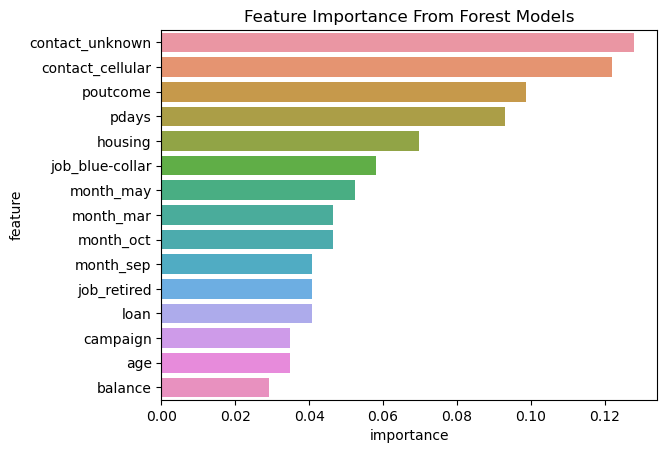

In [ ]:
sns.barplot(
    data=df_feat_importance.head(15),
    x='importance',
    y='feature'
)
plt.title('Feature Importance From Forest Models')
plt.show()

Insight:
<br>
berdasarkan Feature Importance From Forest Models dengan nilai 3 tertinggi:

- Feature Importance 'contact_unknown' mempunyai probabilitas paling tinggi, bahwa pada  **kolom Contact** dengan nilai **unknown** mempunyai entepretasi nasabah **tidak melakukan deposito**. ini di lihat dari data EDA 'Proportion of contact by deposit'
- Feature Importance 'contact_cellular' mempunyai probabilitas paling tinggi ke-2, bahwa pada **kolom Contact** dengan nilai **cellular** mempunyai entepretasi nasabah **melakukan deposito**. ini di lihat dari data EDA 'Proportion of contact by deposit'
- Feature Importance 'month_may' mempunyai probabilitas paling tinggi ke-3, bahwa pada **kolom month** dengan nilai **may** mempunyai entepretasi nasabah **tidak melakukan deposito**. ini di lihat dari data EDA 'Proportion of month by deposit'
<br><br>

Insight:

berdasarkan Feature Importance From Forest Models yang berpengaruh terhadap nasabah yang melakukan deposito adalah:

- Feature Importance 'contact_cellular' mempunyai probabilitas paling tinggi, bahwa pada **kolom Contact** dengan nilai **cellular** mempunyai entepretasi nasabah **melakukan deposito**. ini di lihat dari data EDA 'Proportion of contact by deposit'
- Feature Importance 'month_oct' mempunyai probabilitas paling tinggi ke-2, bahwa pada **kolom month** dengan nilai **oct** mempunyai entepretasi nasabah **melakukan deposito**. ini di lihat dari data EDA 'Proportion of month by deposit'


## **13. Perhitungan Margin dari Setiap Model**

### **13.1 Perhitungan tanpa Machine learning**

In [ ]:
# tanpa mesin learning
marketing = (815+746) * cost_marketing
pendapatan = (746 * balance)*interest
margin = pendapatan - marketing
print(pendapatan,'-',marketing,'=',margin)

36506.0574 - 44800.7 = -8294.6426


### **13.2 Perhitungan dengan Machine learning setelah tuning**

In [ ]:
# dengan mesin learning after tuning
marketing = (387+566) * cost_marketing
pendapatan = (566 * balance)*interest
margin = pendapatan - marketing
print(pendapatan,'-',marketing,'=',margin)

27697.625319571045 - 27351.1 = 346.52531957104657


### **13.3 Perhitungan dengan Machine learning menggunakan threshold margin**

In [ ]:
# dengan mesin learning menggunakan thereshold margin
marketing = (58+264) * cost_marketing
pendapatan = (264 * balance)*interest
margin = pendapatan - marketing
print(pendapatan,'-',marketing,'=',margin)

12919.033717962466 - 9241.4 = 3677.633717962466


## **14. Conclusion**

**FP cost:** 
- Kita memprediksi si calon nasabah akan melakukan deposito, padahal ternyata aktualnya dia tidak melakukan deposito. 
- Karena kita memprediksi si calon nasabah akan melakukan deposito, jadi kita akan berikan penawaran kepada nasabah tsb.
- Akibatnya kita membuang biaya marketing yang sia-sia.

**FN cost:** 
- Kita memprediksi si calon nasabah TIDAK akan melakukan deposito, padahal ternyata dia ingin melakukan deposito. 
- Karena kita memprediksi si calon nasabah TIDAK akan melakukan deposito, jadi Telemarketing TIDAK akan memberikan penawaran terhadap nasabah tersebut. 
- Akibatnya kita kehilangan nasabah yang akan melakukan deposito.
<br><br>

**best models algorithm:**
<br>
RandomForestClassifier(random_state=0)
<br><br>
**best parameters:**
<br>
{'model__max_depth': 1,
 'model__max_features': 4,
 'model__min_samples_leaf': 98,
 'model__min_samples_split': 14,
 'model__n_estimators': 172,
 'prep__pipe_ordinal_scale__scaler': MinMaxScaler(),
 'prep__scaling': MinMaxScaler()}

Upah minimum di negara bagian **California** per 1 Januari 2023 tercatat sebesar US$ 15,50 per jam. asumsikan 1 jam 1 calon nasabah
dan Rata-rata biaya per menit panggilan dari telepon seluler ke telepon seluler lainnya adalah $0,22
,jadi biaya marketing per nasabah sekitar $28,7, maka hitungannya kurang lebih akan seperti ini :

**Perhitungan Sebelum menggunakan Machine learning** :
- berdasarkan data, nasabah yang melakukan deposito mempunyai rata-rata balance/tabungan sekitar $1812 
- berdasarkan data exsisting maka seluruh nasabah di hubungi yaitu terdapat 1.561 nasabah yang terdiri dari nasabah yang melakukan deposito 746 nasabah dan yang tidak 815 nasabah. 
- Nasabah diprediksi melakukan deposito => 746 orang
- **Pendapatan bunga =>  (746 x 1812 dollar) x 0,027 =  36.506 dollar**
- **dana marketing => (815+746) x  28,7 dollar =  44.800 dollar**
- **MARGIN = -8.294 dollar**

**Perhitungan Setelah menggunakan Machine learning** :
- berdasarkan data, nasabah yang melakukan deposito mempunyai rata-rata balance/tabungan sekitar $1812 
- berdasarkan data confusion matrix maka seluruh nasabah di hubungi yaitu terdapat 953 nasabah yang terdiri dari nasabah yang melakukan deposito 566 nasabah dan yang tidak 387 nasabah. 
- Nasabah diprediksi melakukan deposito => 566 orang
- **Pendapatan bunga =>  (566 x 1812 dollar) x 0,027 =  27.697 dollar**
- **dana marketing => (387+566) x  28,7 dollar =  27.351 dollar**
- **MARGIN = 346,5 dollar**
- **Accuracy Machine learning = 71,8%**

**Perhitungan Setelah menggunakan Machine learning dengan threshold terbaik** :
- berdasarkan data, nasabah yang melakukan deposito mempunyai rata-rata balance/tabungan sekitar $1812 
- berdasarkan data confusion matrix maka seluruh nasabah di hubungi yaitu terdapat 322 nasabah yang terdiri dari nasabah yang melakukan deposito 264 nasabah dan yang tidak 58 nasabah. 
- Nasabah diprediksi melakukan deposito => 264 orang
- **Pendapatan bunga =>  (264 x 1812 dollar) x 0,027 =  12.919 dollar**
- **dana marketing => (58+264) x  28,7 dollar =  9.241 dollar**
- **MARGIN = 3.677 dollar**
- **Accuracy Machine learning = 65,4%**

Berdasarkan contoh hitungan tersebut, terlihat bahwa dengan menggunakan machine learning dengan model setelah tuning, maka bank bisa terhindar dari sebuah kerugian. keuntungan maximum yang diperoleh dengan menggunakan Machine learning terbaik sebesar **3.677 dollar** 

**source:** 
<br>
https://katadata.co.id/agungjatmiko/lifestyle/6409829e8e6c3/mengintip-besaran-gaji-di-amerika-serikat-berdasarkan-negara-bagian#:~:text=5.-,New%20York,%24%2014%2C20%20per%20jam.
<br>
https://solaroidenergy.com/product/how-much-is-phone-bills-in-usa/#:~:text=The%20average%20monthly%20cost%20of,taxes%2C%20surcharges%2C%20and%20charges.
<br>
https://tradingeconomics.com/united-states/bank-net-interest-margin-percent-wb-data.html

## **15. Recommendation**

**Rekomendasi terhadap model:**

- Mengecek prediksi mana saja yang memiliki nilai accuracy yang tinggi berdasarkan data Feature Importance. Kita dapat mengelompokkan accuracy tersebut ke dalam grup Deposit dan No Deposit, lalu memilih 3 nilai feature dengan accuracy paling tinggi saja untuk tiap grup. Setelahnya kita bisa mengecek hubungan antara accuracy tersebut dengan tiap variabel independen. Pada akhirnya kita dapat mengetahui sebenarnya variabel mana saja dan aspek apa yang menyebabkan model menghasilkan accuracy yang tinggi.

- kelemahan model ini masih menggunakan **random search** dengan percoabaan 10.000 model sacara acak. yang mana kita belum bisa memastikan bahwa ini adalah model terbaik. tapi saya mencoba untuk meningkatkan performa model dengan menggunakan **grid search** dengan best parameter acuan dari random search. 

- jika model ini menggunakan fitting **grid search** dari awal maka kita akan menemukan model terbaik. tapi kita mengorbankan waktu dan sumber daya yang besar.

- pada penentuan threshold terbaik model menggunakan pendekatan 2 parameter yaitu dengan menggunkan scoring dan margin/profit. ini sebagai cara lain jika menggunakan thereshold dengan scoring hasilnya sama dengan tidak menggunakan machine learning.

- model mempunyai keterbatasan jika mendapat inputan out of range(data diluar rentang) X_train, maka solusinya yaitu melakukan maintenance secara berkala agar performa model semakin baik.

- Menganalisa data-data yang model kita masih salah tebak untuk mengetahui alasannya dan karakteristiknya bagaimana.

**Rekomendasi terhadap bisnis:**

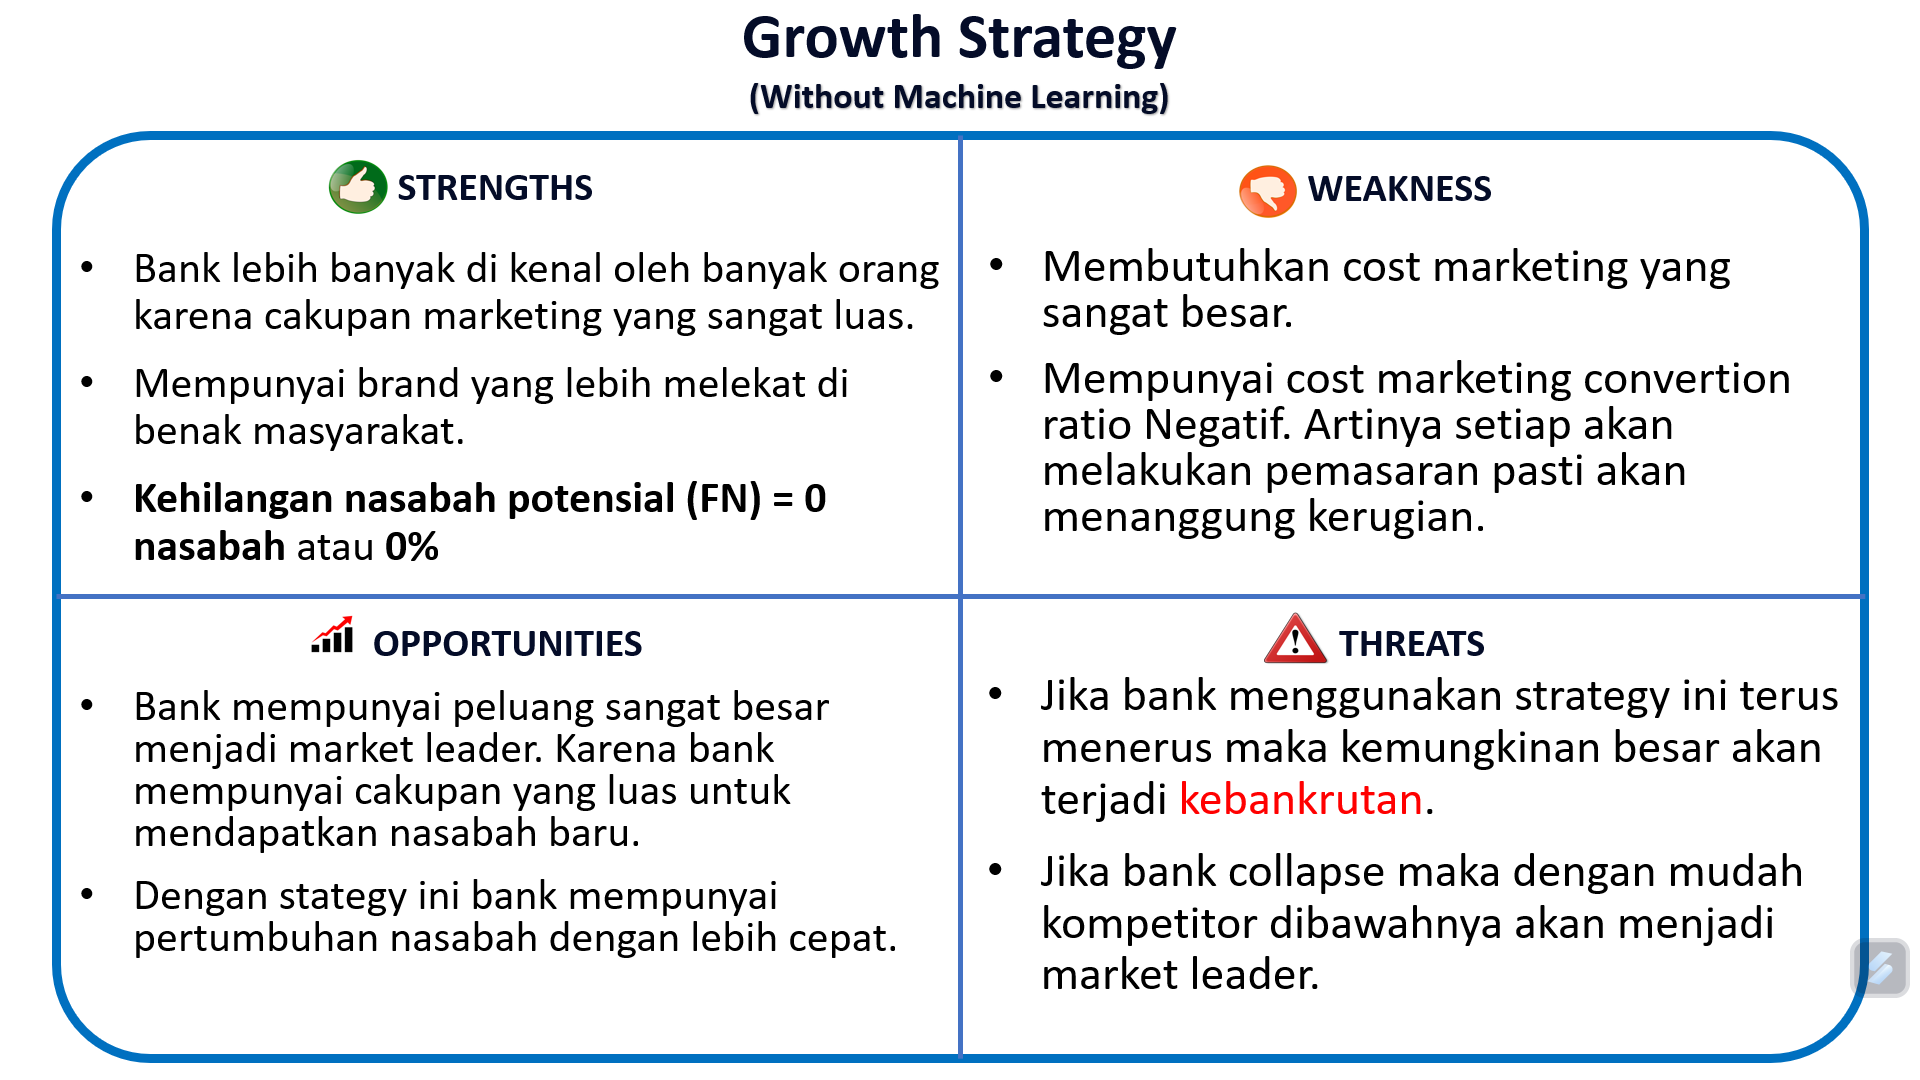

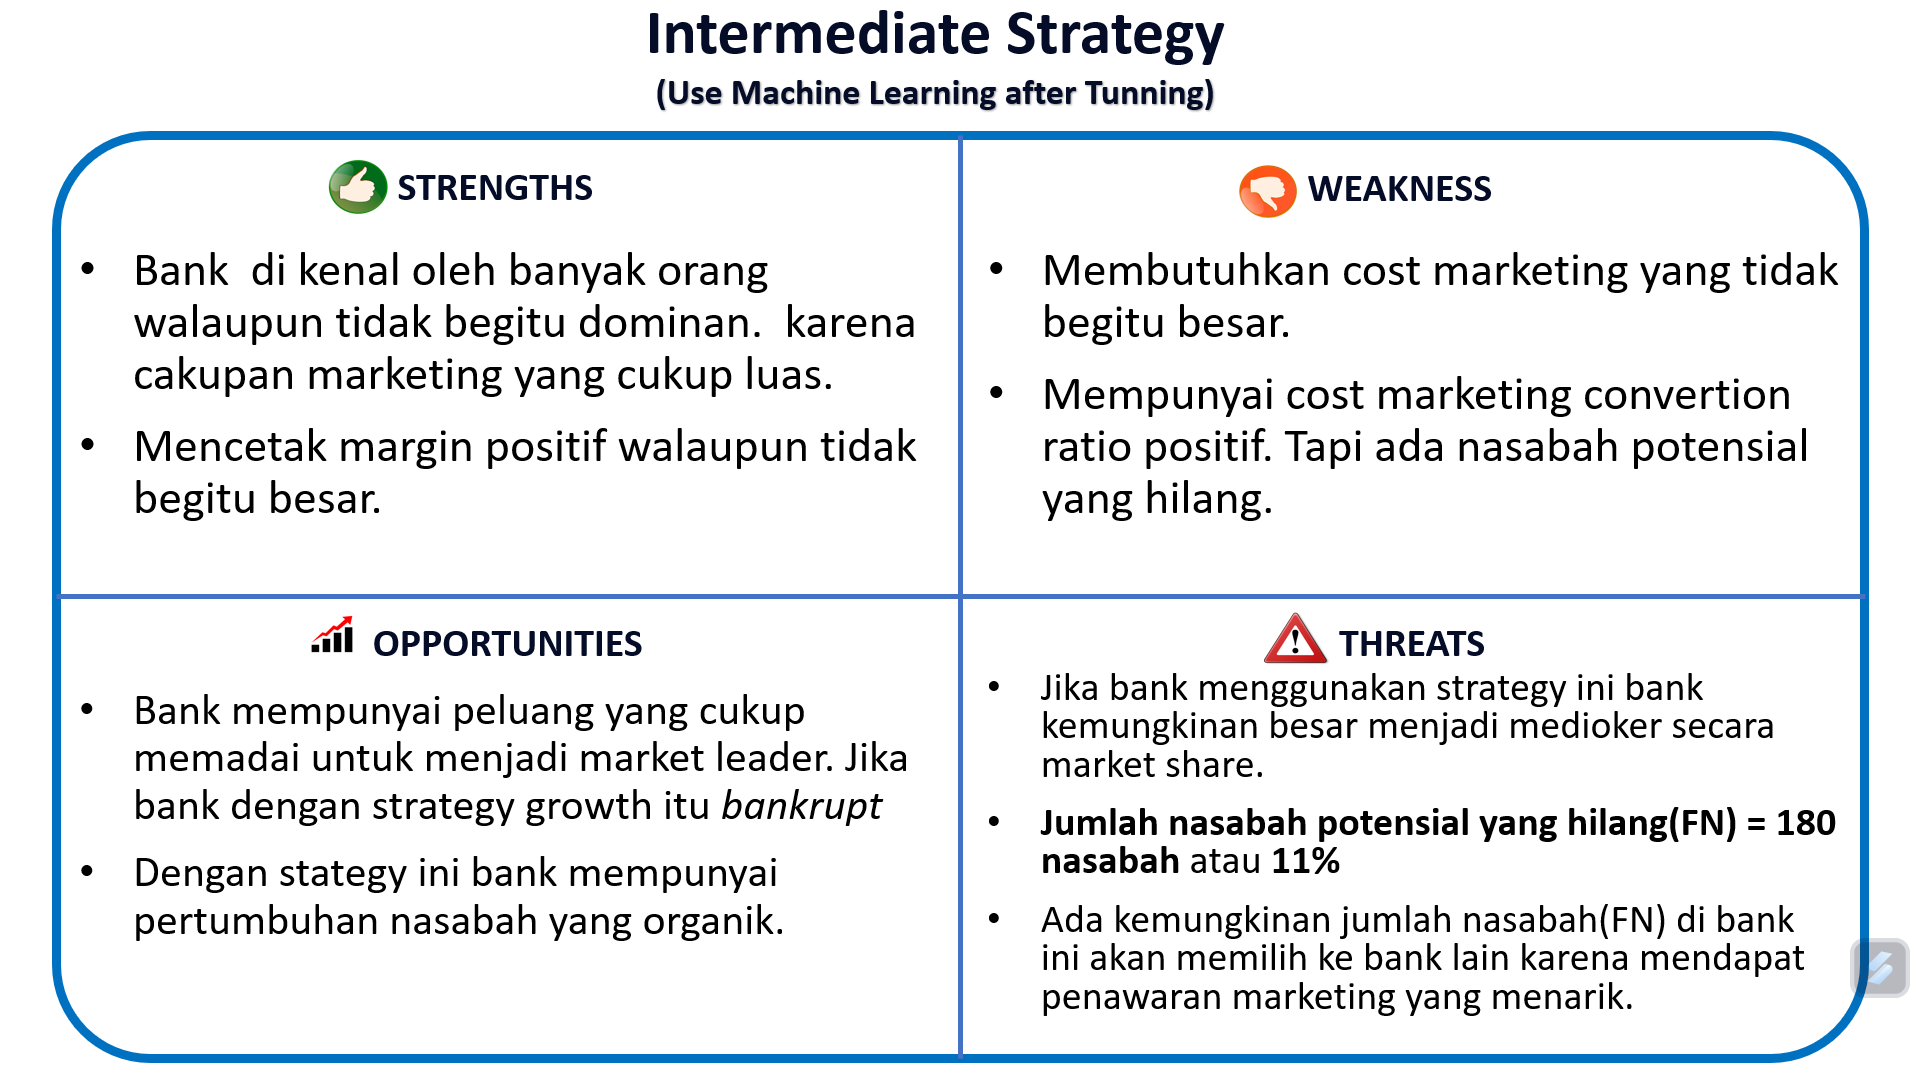

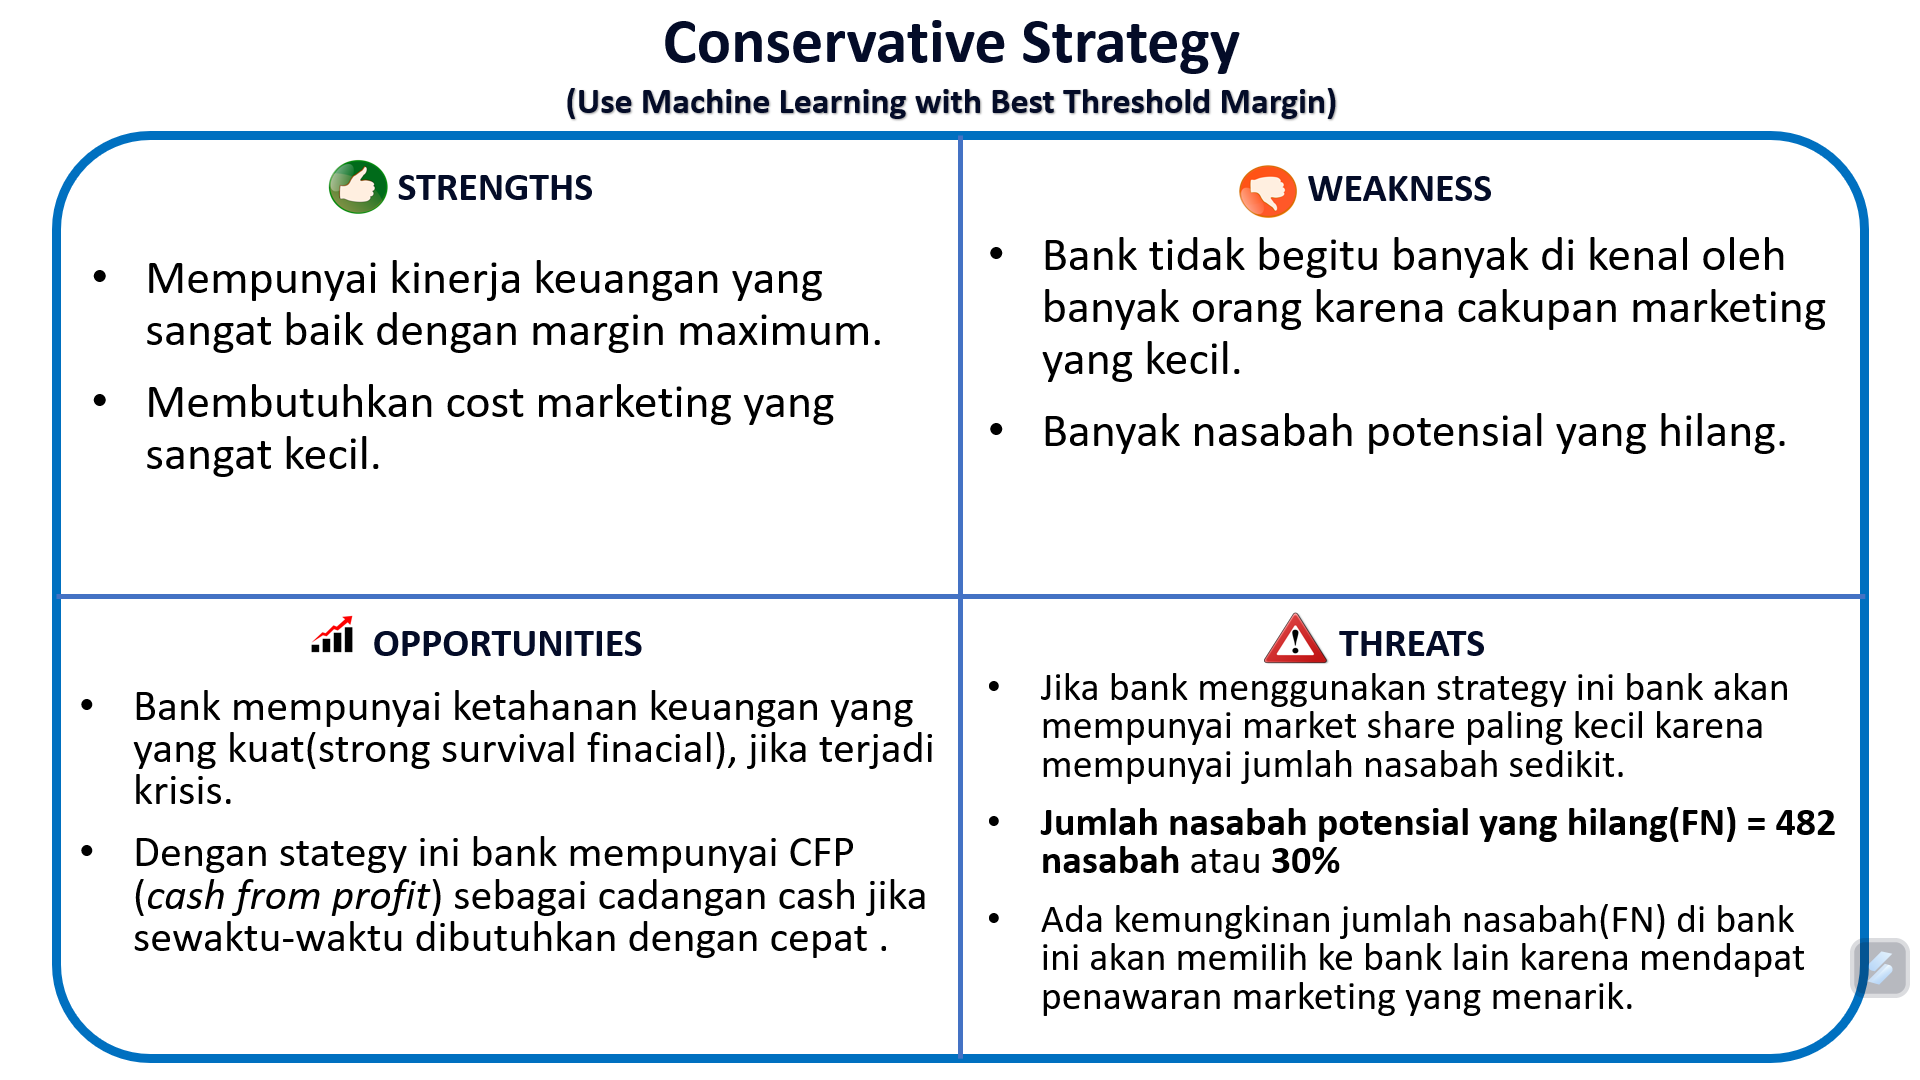

### jika gambar diatas tidak muncul silahkan klik link dibawah:

https://drive.google.com/file/d/1GxwIp6TpqBmBV4l1SZFUGPrI6NLTO4ZR/view?usp=sharing